In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import itertools as it
import scipy.special as psi
plt.style.use('classic')
import seaborn as sns
import pandas as pd
import math as mt
import time
import sys

sys.path.insert(1, '/rds/general/user/lr4617/home/4th_Year_Project/Final_Year_Project/')

from scipy.io import loadmat
from scipy import stats
from numpy.random import seed
from numpy.random import rand
from scipy.integrate import quad
from scipy.io import savemat
from tempfile import TemporaryFile
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.decomposition import KernelPCA
from mpl_toolkits import mplot3d
from mPE_fn import mPE_
from scipy.spatial import distance
from scipy.stats import entropy
from mPE_ultis import integrand, ubble, array_list, permutation
from util import rolling_mean, probability, probability_v2, get_mPE_matrix
from sklearn.cluster import KMeans
sns.color_palette("colorblind")


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## mPE vs Time Analysis - MACRO/RAT 

/rds/general/user/lr4617/home/anaconda3/envs/prj_env_conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


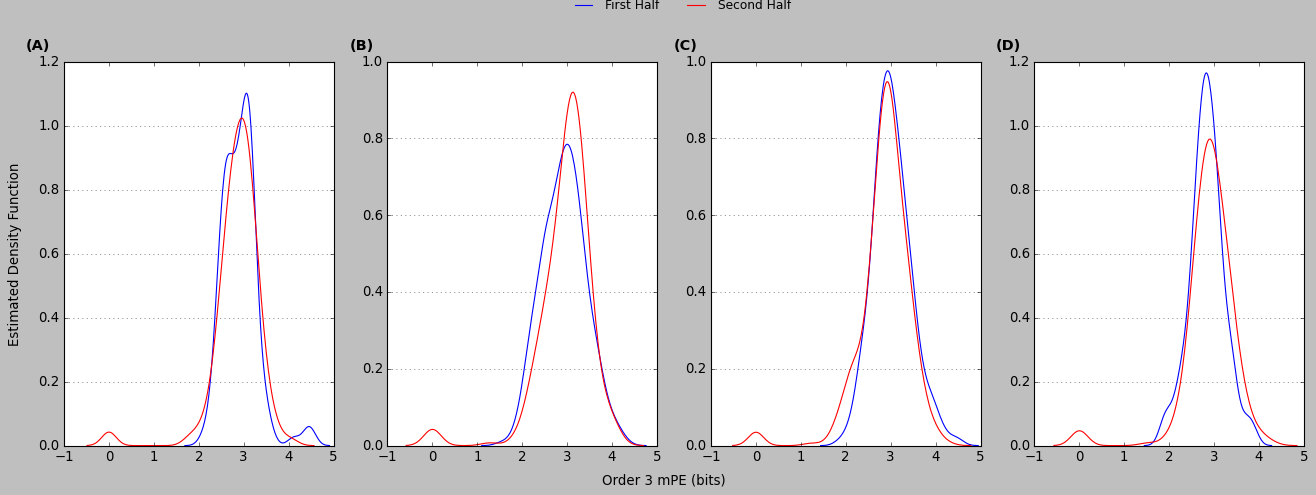

In [4]:
mode = 'normal'
n_PC = 2
eval_step = 'result'

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

###############################################
######## mPE distribution vs time plot ########
###############################################

labels_each = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']

if mode == 'normal':
    fig, axs = plt.subplots(1,4, figsize=(20, 8))
    l = []
    labels = ['First Half', 'Second Half']
    for idx, ii in enumerate(mPE_specs):
        mPE_vector = np.load(path + ii)
        a1 = sns.kdeplot(mPE_vector[0, :, 0], ax=axs[idx], color="blue", shade=False)
        l.append(a1)
        a2 = sns.kdeplot(mPE_vector[1, :, 0], ax=axs[idx], color="red", shade=False)
        l.append(a2)
        
        axs[idx].set_xlabel('')
        axs[idx].set_ylabel('')
        axs[idx].grid(axis='y', alpha=0.75)
        axs[idx].text(-0.05, 1.06, labels_each[idx], transform=axs[idx].transAxes, fontsize=13, fontweight='bold', va='top', ha='right') 

    fig.legend(l, labels=labels, loc=(0.43, 0.965), ncol=2, fontsize='11', frameon=False)
    fig.text(0.5, 0.02, 'Order 3 mPE (bits)', ha='center')
    fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical')
    
    plt.savefig(path_out + 'test_normal.png')
    
    fig.show()

    
else:
    fig, axs = plt.subplots(2,4, figsize=(20, 7))
    l = []
    labels = ['First Half', 'Second Half']
    for idx, ii in enumerate(mPE_specs):
        cnt = idx
        if idx <=3:
            idx1 = 0
        else:
            idx = idx - 4
            idx1 = 1
            
        mPE_vector = np.load(path + ii)
        a1 = sns.kdeplot(mPE_vector[0, :, 0], ax=axs[idx1, idx], color="blue", shade=False)
        l.append(a1)
        a2 = sns.kdeplot(mPE_vector[1, :, 0], ax=axs[idx1, idx], color="red", shade=False)
        l.append(a2)
        
        axs[idx1, idx].set_xlabel('')
        axs[idx1, idx].set_ylabel('')
        axs[idx1, idx].grid(axis='y', alpha=0.75)
        axs[idx1, idx].text(-0.05, -0.8, labels[cnt], transform=axs[i, j].transAxes, fontsize=16, fontweight='bold', va='top', ha='right') 
        
    fig.legend(l, labels=labels, loc=(0.4, 0.95), ncol=2, fontsize='16', frameon=False)
    fig.text(0.5, 0.02, 'Order 3 mPE (bits)', ha='center', fontsize='18')
    fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical', fontsize='18')
    
    # plt.savefig(path_out + 'test_drug.png')

    fig.show()

        

mPE_control_traj_1.npy
(2, 136)
0.8576381199506492 0.25457118817181246
mPE_control_traj_5.npy
(2, 136)
0.7672733662431378 0.23040285313955736
mPE_control_traj_3.npy
(2, 136)
0.565101236378684 0.2124275165693608
mPE_control_traj_2.npy
(2, 136)
0.9735883783268918 0.2275358007982381


/rds/general/user/lr4617/home/anaconda3/envs/prj_env_conda/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not s

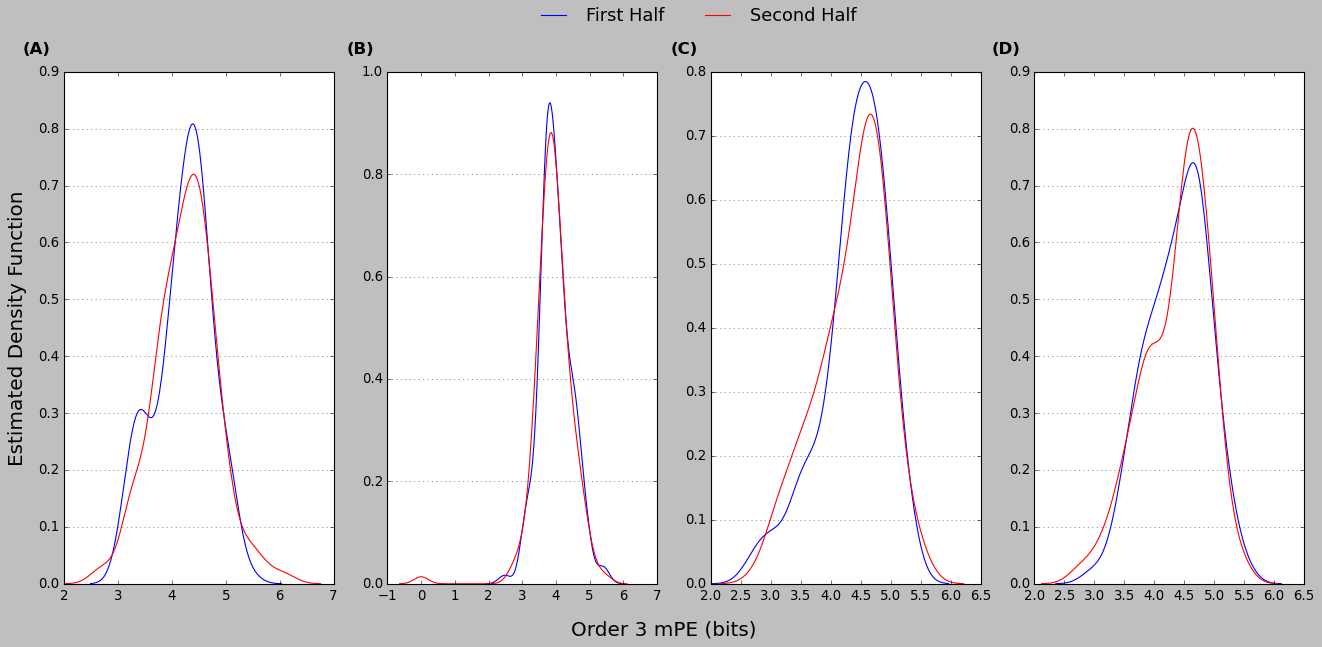

In [17]:
which = ''
if which == '':
    add_on = ''
else:
    add_on = '_' + which
n_PC = 3

n_clusters_kmeans = 30
significance_level = 0.05
labels_each = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
labels = ['First Half', 'Second Half']

######################################
type_ = 'macro'
modes = ['normal']
eval_step = 'control'
######################################

fig, axs = plt.subplots(1,4, figsize=(20, 8))
l = []
    
path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time_SUBJ' + add_on + '/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/'
mPE_specs = os.listdir(path)

for idx, result in enumerate(mPE_specs):

    print(result)

    traj_mPE = np.load(path + result)
    mPE_vector = traj_mPE[:, :, 0]

    print(mPE_vector.shape)            
    ########## Retrieve maxiumum number of elements based on k-means discretization ##########
    data = mPE_vector.flatten()
    kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
    kmeans.predict(data.reshape(-1,1))
    centroids = kmeans.cluster_centers_
    centroids = [centroids[i] for i in range(len(centroids))]
    centroids = np.asarray(centroids)

    prob1 = probability_v2(mPE_vector[0, :], centroids)
    prob2 = probability_v2(mPE_vector[1, :], centroids)

    significance_lev = significance_level
    js_distance = distance.jensenshannon(prob1, prob2)
    [stat, p_value] = stats.ks_2samp(mPE_vector[0, :], mPE_vector[1, :])

    print(p_value, js_distance)

    a1 = sns.kdeplot(mPE_vector[0, :], ax=axs[idx], color="blue", shade=False)
    l.append(a1)
    a2 = sns.kdeplot(mPE_vector[1, :], ax=axs[idx], color="red", shade=False)
    l.append(a2)

    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].grid(axis='y', alpha=0.75)
    axs[idx].text(-0.05, 1.06, labels_each[idx], transform=axs[idx].transAxes, fontsize=15, fontweight='bold', va='top', ha='right') 

fig.legend(l, labels=labels, loc=(0.4, 0.95), ncol=2, fontsize='16', frameon=False)
fig.text(0.5, 0.02, 'Order 3 mPE (bits)', ha='center', fontsize='18')
fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical', fontsize='18')

path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

plt.savefig(path_out + 'long_time_expem' + add_on + '.png')
plt.savefig(path_out + 'long_time_expem' + add_on + '.eps')

fig.show()

## mPE vs Time Analysis - MACRO/EXPEM 

traj_1.npy
traj_2.npy
traj_3.npy
traj_5.npy
(2, 220)
0.9469497282769835 0.1855874659530246
traj_7.npy
traj_1.npy
traj_3.npy
traj_5.npy
(2, 220)
7.962399924405057e-11 0.44031364466369016
traj_8.npy
traj_4.npy
traj_2.npy
traj_6.npy
(2, 220)
7.962399924405057e-11 0.4713969813635344


/rds/general/user/lr4617/home/anaconda3/envs/prj_env_conda/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


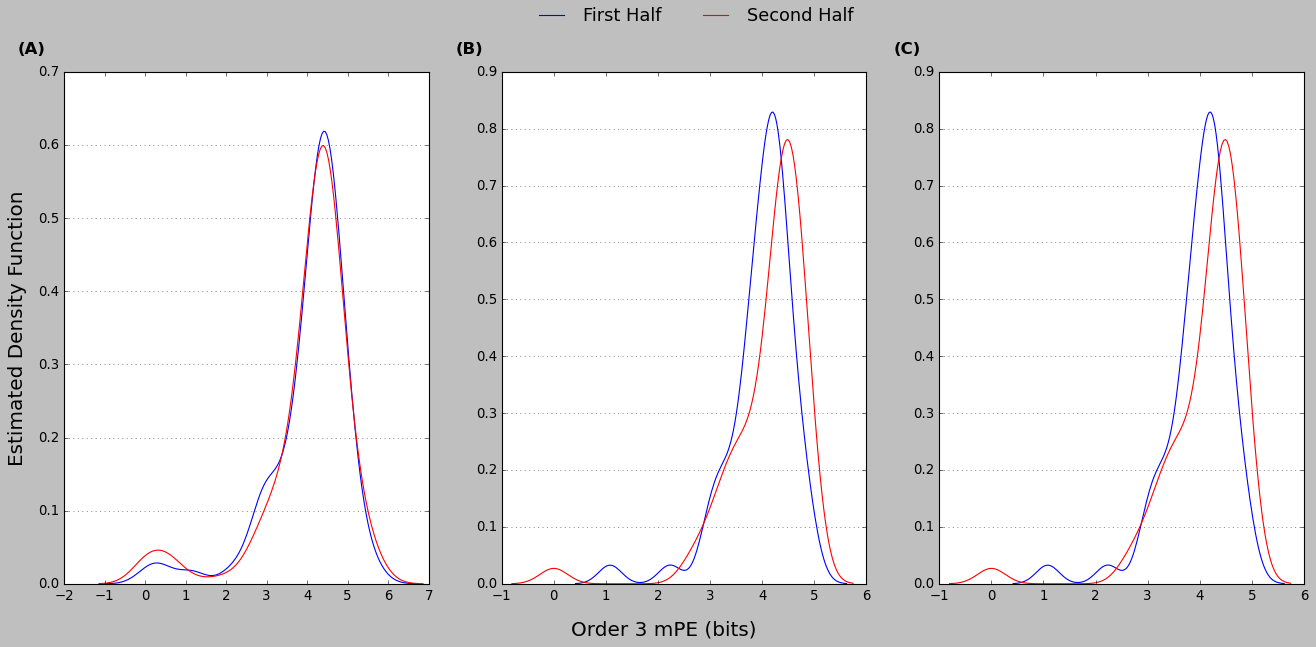

In [5]:
which = ''
if which == '':
    add_on = ''
else:
    add_on = '_' + which

modes = ['normal', 'amphetamine', 'caffeine']
n_PC = 3
eval_step = 'result'
n_clusters_kmeans = 30
significance_level = 0.05
type_ = 'macro'
labels_each = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
labels = ['First Half', 'Second Half']

fig, axs = plt.subplots(1,3, figsize=(20, 8))
l = []

for idx, mode in enumerate(modes):      
    
    path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/RESULTS/mPE_vs_time/mPE_vs_time_marker_SpineF' + add_on + '/' + str(eval_step) + '/' + mode + '/'
    mPE_specs = os.listdir(path)
    
    if eval_step == 'result':
        for i, result in enumerate(mPE_specs):

            print(result)

            # if 'result' in result:
            traj_mPE = np.load(path + result)
            traj_mPE = traj_mPE[:, :, 0]

            if i==0:
                mPE_vector = traj_mPE
            else:
                mPE_vector = np.concatenate((mPE_vector, traj_mPE), axis=1)
    
    else:
        for i, result in enumerate(mPE_specs):
            traj_mPE = np.load(path + result)
            mPE_vector = traj_mPE[:, :, 0]

    print(mPE_vector.shape)            
    ########## Retrieve maxiumum number of elements based on k-means discretization ##########
    data = mPE_vector.flatten()
    kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
    kmeans.predict(data.reshape(-1,1))
    centroids = kmeans.cluster_centers_
    centroids = [centroids[i] for i in range(len(centroids))]
    centroids = np.asarray(centroids)
    
    prob1 = probability_v2(mPE_vector[0, :], centroids)
    prob2 = probability_v2(mPE_vector[1, :], centroids)

    significance_lev = significance_level
    js_distance = distance.jensenshannon(prob1, prob2)
    [stat, p_value] = stats.ks_2samp(mPE_vector[0, :], mPE_vector[1, :])

    print(p_value, js_distance)
    
    a1 = sns.kdeplot(mPE_vector[0, :], ax=axs[idx], color="blue", shade=False)
    l.append(a1)
    a2 = sns.kdeplot(mPE_vector[1, :], ax=axs[idx], color="red", shade=False)
    l.append(a2)
        
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].grid(axis='y', alpha=0.75)
    axs[idx].text(-0.05, 1.06, labels_each[idx], transform=axs[idx].transAxes, fontsize=15, fontweight='bold', va='top', ha='right') 

fig.legend(l, labels=labels, loc=(0.4, 0.95), ncol=2, fontsize='16', frameon=False)
fig.text(0.5, 0.02, 'Order 3 mPE (bits)', ha='center', fontsize='18')
fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical', fontsize='18')

path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/RESULTS/Macro/'

#plt.savefig(path_out + 'long_time_expem_' + add_on + '_' + eval_step +'.png')
#plt.savefig(path_out + 'long_time_expem_' + add_on + '_' + eval_step + '.eps')

fig.show()

## Velocity evolution Macro

FileNotFoundError: [Errno 2] No such file or directory: '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity_SUBJ_parition_up/3PC/result/normal/'

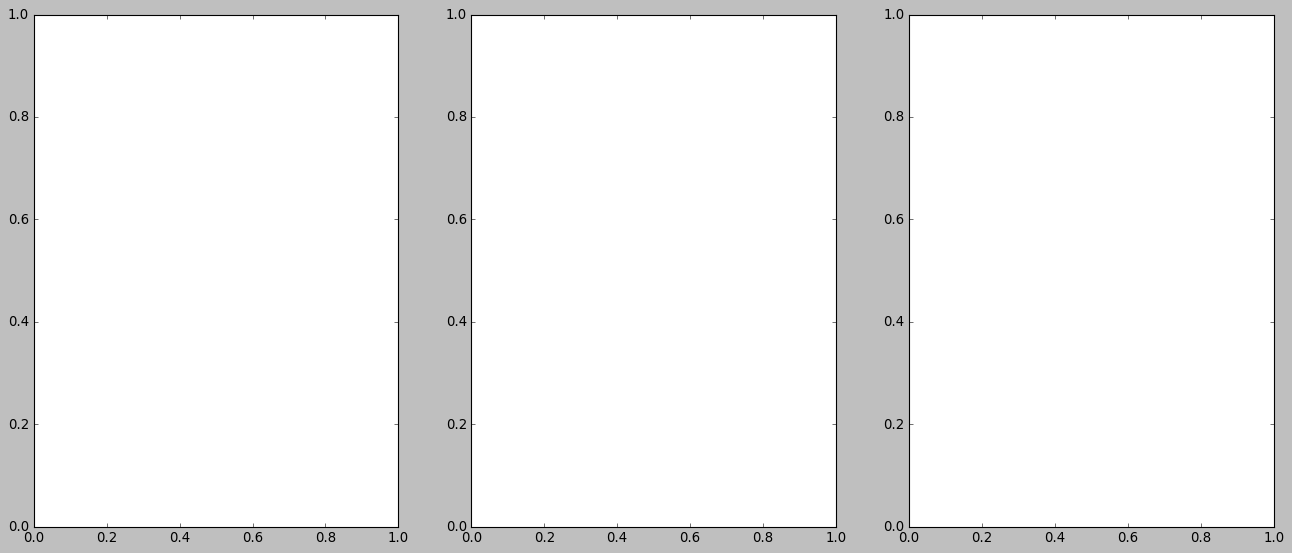

In [24]:
which = 'parition_up'
if which == '':
    add_on = ''
else:
    add_on = '_' + which

modes = ['normal', 'amphetamine', 'caffeine']
n_PC = 3
eval_step = 'result'
n_clusters_kmeans = 30
significance_level = 0.05
type_ = 'macro'
labels_each = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
labels = ['First Half', 'Second Half']

fig, axs = plt.subplots(1,3, figsize=(20, 8))
l = []

for idx, mode in enumerate(modes):      
    
    path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity_SUBJ' + add_on + '/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/'
    mPE_specs = os.listdir(path)
    
    if eval_step == 'result':
        for i, result in enumerate(mPE_specs):
            
            print(result)
            
            if 'result' in result:
                traj_mPE = np.load(path + result)
                traj_mPE = traj_mPE[:, :, 0]

                if i==0:
                    mPE_vector = traj_mPE
                else:
                    mPE_vector = np.concatenate((mPE_vector, traj_mPE), axis=1)
    
    else:
        for i, result in enumerate(mPE_specs):
            traj_mPE = np.load(path + result)
            mPE_vector = traj_mPE[:, :, 0]

    print(mPE_vector.shape)            
    ########## Retrieve maxiumum number of elements based on k-means discretization ##########
    data = mPE_vector.flatten()
    kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
    kmeans.predict(data.reshape(-1,1))
    centroids = kmeans.cluster_centers_
    centroids = [centroids[i] for i in range(len(centroids))]
    centroids = np.asarray(centroids)
    
    prob1 = probability_v2(mPE_vector[0, :], centroids)
    prob2 = probability_v2(mPE_vector[1, :], centroids)

    significance_lev = significance_level
    js_distance = distance.jensenshannon(prob1, prob2)
    [stat, p_value] = stats.ks_2samp(mPE_vector[0, :], mPE_vector[1, :])

    print(p_value, js_distance)
    
    a1 = sns.kdeplot(mPE_vector[0, :], ax=axs[idx], color="blue", shade=False)
    l.append(a1)
    a2 = sns.kdeplot(mPE_vector[1, :], ax=axs[idx], color="red", shade=False)
    l.append(a2)
        
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].grid(axis='y', alpha=0.75)
    axs[idx].text(-0.05, 1.06, labels_each[idx], transform=axs[idx].transAxes, fontsize=15, fontweight='bold', va='top', ha='right') 

fig.legend(l, labels=labels, loc=(0.4, 0.95), ncol=2, fontsize='16', frameon=False)
fig.text(0.5, 0.02, 'Order 3 mPE (bits)', ha='center', fontsize='18')
fig.text(0.09, 0.5, 'Estimated Density Function', va='center', rotation='vertical', fontsize='18')

path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/RESULTS/Macro/'

plt.savefig(path_out + 'long_time_expem_' + add_on + '_' + eval_step +'.png')
plt.savefig(path_out + 'long_time_expem_' + add_on + '_' + eval_step + '.eps')

fig.show()

## p-value Analysis - MACRO

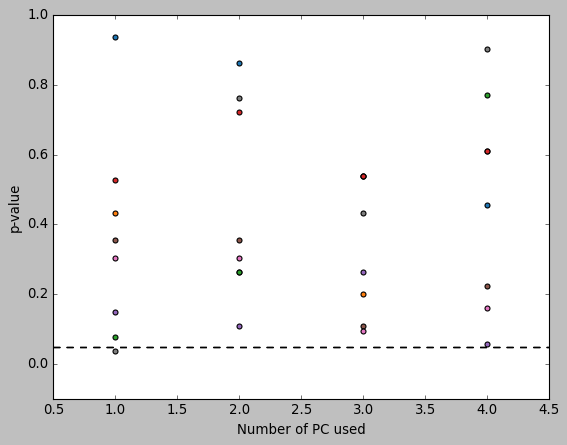

In [10]:
mode = 'drug'
n_PC = 3
eval_step = 'result'

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

if mode == 'drug':
    p_values = np.zeros((8,4))
if mode == 'normal':
    p_values = np.zeros((4,4))

for n_PC in range(1,5):

    path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/macro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/' + 'mPE/'

    for idx, ii in enumerate(mPE_specs):

        mPE_vector = np.load(path + ii)

        ########## Retrieve maxiumum number of elements based on k-means discretization ##########
        data = mPE_vector.flatten()
        kmeans = KMeans(n_clusters=15).fit(data.reshape(-1,1))
        kmeans.predict(data.reshape(-1,1))
        centroids = kmeans.cluster_centers_
        centroids = [centroids[i] for i in range(len(centroids))]
        centroids = np.asarray(centroids)

        prob1 = probability_v2(mPE_vector[0, :, 0], centroids)
        prob2 = probability_v2(mPE_vector[1, :, 0], centroids)

        js_distance = distance.jensenshannon(prob1, prob2)
        [stat, p_value] = stats.ks_2samp(mPE_vector[0, :, 0], mPE_vector[1, :, 0])

        p_values[idx, n_PC-1] = p_value

cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(8):
    plt.scatter(np.arange(1,5), p_values[i, :], c=cs[i])
    plt.axhline(y=0.05, color="black", linestyle="--")
    plt.xlabel('Number of PC used')
    plt.ylabel('p-value')
    plt.ylim([-0.1, 1])
plt.show()

## mPE vs Time Analysis - MICRO

In [13]:
which = 'marker'
if which == '':
    add_on = ''
else:
    add_on = '_' + which

modes = ['normal', 'amphetamine', 'caffeine']
n_PC = 3
eval_step = 'result'
n_clusters_kmeans = 15
significance_level = 0.1
labels_each = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
labels = ['First Half', 'Second Half']

# fig, axs = plt.subplots(1,3, figsize=(20, 8))
l = []
max_idx = 6
bins_number = 8

specs = np.zeros((bins_number*3, 6))

for idx, mode in enumerate(modes):      
    
    print(mode)
    
    path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time' + add_on + '/micro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/'
    mPE_specs = os.listdir(path)
    print(mPE_specs)
    
    if eval_step == 'result':
        for i, result in enumerate(mPE_specs):
                
            traj_mPE = np.load(path + result)
            print(traj_mPE.shape)

            if traj_mPE.shape[0] < 6:
                traj_mPE_ = np.zeros((max_idx, traj_mPE.shape[1]))
                traj_mPE_[0:3, :] = traj_mPE[:, :, 0]
                traj_mPE_[3:max_idx, :] = traj_mPE[:, :, 0]
                traj_mPE = traj_mPE_

            else:
                traj_mPE = traj_mPE[:, :, 0]

            if i==0:
                mPE_vector = traj_mPE
            else:
                mPE_vector = np.concatenate((mPE_vector, traj_mPE), axis=1)
    
    else:
        for i, result in enumerate(mPE_specs):
            mPE_vector = np.load(path + result)
            
    path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_velocity/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/'
    vel_specs = os.listdir(path)
    print(vel_specs)
    
    
    if eval_step == 'result':
        for i, result in enumerate(vel_specs):
                
            vel = np.load(path + result)
            
            if vel.shape[0] < max_idx:
                print(vel.shape)
                vel_ = np.zeros((max_idx, vel.shape[1]))
                vel_[0:3, :] = vel[:, :, 0]
                vel_[3:max_idx, :] = vel[:, :, 0]
                vel = vel_

            else:
                vel = vel[:, :, 0]

            if i==0:
                vel_vector = vel
            else:
                vel_vector = np.concatenate((vel_vector, vel), axis=1)
    
    else:
        for i, result in enumerate(vel_specs):
            vel_vector = np.load(path + result)
    
            
    ########## Retrieve maxiumum number of elements based on k-means discretization ##########
    data = mPE_vector.flatten()
    kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
    kmeans.predict(data.reshape(-1,1))
    centroids = kmeans.cluster_centers_
    centroids = [centroids[i] for i in range(len(centroids))]
    centroids = np.asarray(centroids)
    
    ########## Retrieve maxiumum number of elements based on k-means discretization ##########
    data_ = vel_vector.flatten()
    kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data_.reshape(-1,1))
    kmeans.predict(data_.reshape(-1,1))
    centroids_ = kmeans.cluster_centers_
    centroids_ = [centroids_[i] for i in range(len(centroids_))]
    centroids_ = np.asarray(centroids_)

    ########## plotting mPE continuous distribution as a function of time ##########        
    bins_number = mPE_vector.shape[0]
    compare_to_mPE = mPE_vector[0, :]
    compare_to_vel = vel_vector[0, :]

    '''p_value_array = np.zeros((bins_number-1, ))
    js_array = np.zeros((bins_number-1, ))'''
    
    print(bins_number)
    

    for bin_n in range(1, bins_number):
        [_, p_value_mPE] = stats.ks_2samp(mPE_vector[bin_n, :], compare_to_mPE)
        [_, p_value_vel] = stats.ks_2samp(vel_vector[bin_n, :], compare_to_vel)
        

        prob1 = probability_v2(compare_to_mPE, centroids)
        prob2 = probability_v2(mPE_vector[bin_n, :], centroids)
        
        prob3 = probability_v2(compare_to_vel, centroids_)
        prob4 = probability_v2(vel_vector[bin_n, :], centroids_)

        js_distance_mPE = distance.jensenshannon(prob1, prob2)
        js_distance_vel = distance.jensenshannon(prob3, prob4)
        
        print(p_value_mPE, js_distance_mPE, p_value_vel, js_distance_vel)


        if p_value_mPE <= significance_level:
            print('check')
            specs[idx*bin_n, 0] = p_value_mPE
            specs[idx*bin_n, 1] = js_distance_mPE
            
            if (np.mean(mPE_vector[bin_n, :]) > np.mean(compare_to_mPE)): 
                greater = 1
            else:
                greater = -1
            
            specs[idx*bin_n, 2] = greater
            
            specs[idx*bin_n, 3] = p_value_vel
            specs[idx*bin_n, 4] = js_distance_vel
            
            if (np.mean(vel_vector[bin_n, :]) > np.mean(compare_to_vel)): 
                greater = 1
            else:
                greater = -1
            
            specs[idx*bin_n, 5] = greater
            
            
            compare_to_mPE = mPE_vector[bin_n, :]
            compare_to_vel = vel_vector[bin_n, :]
            
print(specs)

normal
['traj_1.npy', 'traj_2.npy', 'traj_3.npy', 'traj_5.npy']
(6, 18, 1)
(6, 18, 1)
(6, 18, 1)
(6, 18, 1)
['normal_traj_2.npy', 'normal_traj_5.npy', 'normal_traj_3.npy', 'normal_traj_1.npy']
6
0.19180858620233485 0.2338098064429782 0.4836290009396859 0.13176419035631606
0.19180858620233485 0.2327856348051765 0.6966800040199376 0.17763203641829872
0.7695469627551301 0.24001857055599066 0.23712702173898134 0.1909646671372901
0.493831852826011 0.24235860619332547 0.5879759185183517 0.20983503313604313
0.37219871164407936 0.24626762377352507 0.4836290009396859 0.20164828927299827
amphetamine
['traj_7.npy', 'traj_1.npy', 'traj_3.npy', 'traj_5.npy']
(6, 18, 1)
(6, 18, 1)
(6, 18, 1)
(6, 18, 1)
['drug_traj_3.npy', 'drug_traj_5.npy', 'drug_traj_7.npy', 'drug_traj_1.npy']
(3, 30, 1)
6
1.5219071116474116e-08 0.4884312407900131 0.3065582476885422 0.2172202508746187
check
3.022865021471926e-05 0.43072291513427835 0.3889566002413223 0.1643078492256366
check
1.8068505819845153e-15 0.592382132052352

In [11]:
mode = 'drug'
n_PC = 3
eval_step = 'result'
n_clusters_kmeans = 15
significance_level = 0.05

path = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/entropy_analysis/mPE_vs_time/micro/' + str(n_PC) + 'PC/' + str(eval_step) + '/' + mode + '/'
mPE_specs = os.listdir(path)
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/'

mode_spec = 'caffeine'

if mode == 'normal':
    max_idx = 15
elif mode == 'drug':
    max_idx = 6


if mode_spec == 'amphetamine':
    trajs = ['traj_1.npy', 'traj_3.npy', 'traj_5.npy', 'traj_7.npy']
else:
    trajs = ['traj_2.npy', 'traj_4.npy', 'traj_6.npy', 'traj_8.npy']

for i, result in enumerate(mPE_specs):
    
    traj_mPE = np.load(path + result)
    print(traj_mPE.shape)
    
    if mode == 'drug' and result in trajs:
        if i == 1 and mode_spec == 'amphetamine':
            traj_mPE_ = np.zeros((max_idx,15))
            traj_mPE_[0:3, :] = traj_mPE[:, :, 0]
            traj_mPE_[3:max_idx, :] = traj_mPE_
            traj_mPE = traj_mPE_
        else:
            traj_mPE = traj_mPE[0:max_idx, :, 0]
    else:
        traj_mPE = traj_mPE[0:max_idx, :, 0]
        
    if i==0:
        mPE_vector = traj_mPE
    else:
        mPE_vector = np.concatenate((mPE_vector, traj_mPE), axis=1)

########## Retrieve maxiumum number of elements based on k-means discretization ##########
data = mPE_vector.flatten()
kmeans = KMeans(n_clusters=n_clusters_kmeans).fit(data.reshape(-1,1))
kmeans.predict(data.reshape(-1,1))
centroids = kmeans.cluster_centers_
centroids = [centroids[i] for i in range(len(centroids))]
centroids = np.asarray(centroids)

########## plotting mPE continuous distribution as a function of time ##########        
fig = plt.figure()

bins_number = mPE_vector.shape[0]
compare_to = mPE_vector[0, :]

p_value_array = np.zeros((bins_number-1, ))
js_array = np.zeros((bins_number-1, ))
means = np.zeros((bins_number, ))
means[0] = np.mean(compare_to)
stds = np.zeros((bins_number, ))
stds[0] = np.std(compare_to)

for bin_n in range(1, bins_number):
    [_, p_value] = stats.ks_2samp(mPE_vector[bin_n, :], compare_to)
    print(p_value)
    p_value_array[bin_n -1] = p_value

    prob1 = probability_v2(compare_to, centroids)
    prob2 = probability_v2(mPE_vector[bin_n, :], centroids)

    js_distance = distance.jensenshannon(prob1, prob2)
    js_array[bin_n - 1] = js_distance 
    
    if p_value <= significance_level:
        ax = sns.kdeplot(mPE_vector[bin_n, :])
        ax = sns.kdeplot(mPE_vector[bin_n-1, :])
        compare_to = mPE_vector[bin_n, :]

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Order 3 mPE (bits)')
plt.ylabel('Estimated Density Function')

(6, 15, 1)
(6, 15, 1)
(6, 15, 1)
(6, 15, 1)
(6, 15, 1)
(3, 15, 1)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6 and the array at index 1 has size 3

## mPE BIAS ANALYSIS

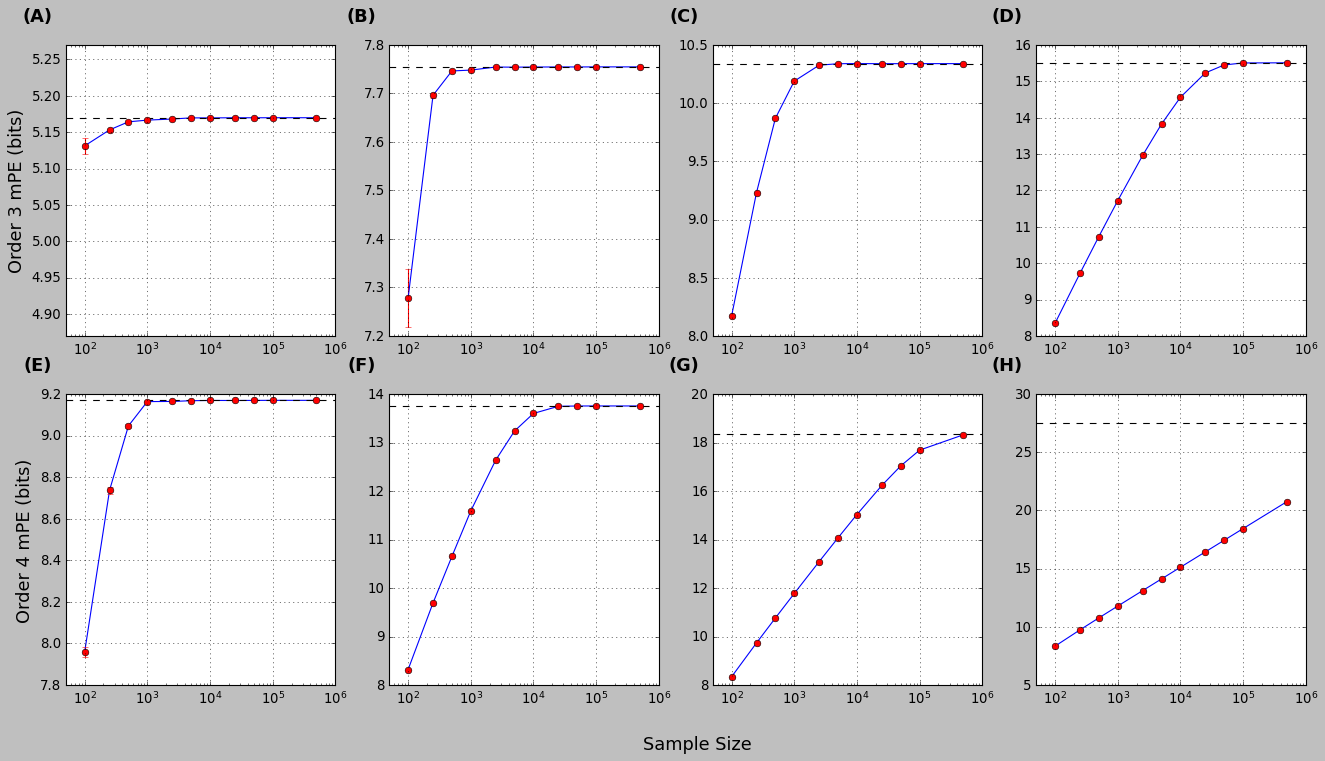

In [15]:
bias_data = np.load('/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/control_analysis/bias_reduction_data.npy')

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']
sizes = [100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 500000]
n_PCs = [2,3,4,6]

xlims = [[4.85, 5.23]]

# convergence analysis over 20 trials
for j in range(bias_data.shape[2]):
    cnt = j
    if j <=3:
        order = 3
        i = 0
        H_bound = np.log2(mt.factorial(order)**n_PCs[j])
    else:
        order = 4
        j = j - 4
        i = 1
        H_bound = np.log2(mt.factorial(order)**n_PCs[j])
        
    sample_H = bias_data[:, :, cnt]
    axs[i, j].plot(sizes, np.mean(sample_H, axis=0))
    axs[i, j].errorbar(sizes, np.mean(sample_H, axis=0), yerr=np.var(sample_H, axis=0), fmt="o", color="r")
    axs[i, j].axhline(y=H_bound, color="black", linestyle="--")
    if j == 0:
        axs[i, j].set_ylabel('Order ' + str(order) + ' mPE (bits)', fontsize=16)
    else:
        axs[i, j].set_ylabel('')

    axs[i, j].set_xscale("log")
    axs[i, j].set_xlim([50, 1e06])

    x_min, x_max, y_min, y_max = axs[i, j].axis()
    if y_max - y_min < 0.3:
        axs[i][j].set_ylim([H_bound - 0.3,  + H_bound + 0.1])
    axs[i, j].grid(True, which="major")
    axs[i, j].text(-0.05, 1.13, labels[cnt], transform=axs[i, j].transAxes, fontsize=16, fontweight='bold', va='top', ha='right') 


    cnt += 1

fig.text(0.52, 0.02, 'Sample Size', fontsize=16, ha='center')
fig.show()
name_out = 'bias_reduction_2'
path_out = '/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/control_analysis/'
plt.savefig(path_out +  name_out  + ".eps")

## MARKER DMI ANALYSIS

In [3]:
marker_DMI = np.load('/rds/general/user/lr4617/home/4th_Year_Project/Final_Report/marker_DMI_3PC.npy')
for i in range(marker_DMI.shape[0]):
    DMI = marker_DMI[i, :]
    DMI_sorted = np.sort(DMI)
    max_3 = np.argwhere(DMI > DMI_sorted[16]).flatten()
    print(max_3)
print(marker_DMI)

(20,)
[3 4 6]
(20,)
[10 12 14]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
(20,)
[ 3  6 13]
(20,)
[ 3  6 12]
(20,)
[ 3 12 13]
(20,)
[ 3 12 13]
[[0.25139156 0.32307868 0.31104281 0.56763366 0.52887507 0.3803315
  0.53087279 0.46050417 0.29224262 0.24743262 0.35701845 0.26553383
  0.51931223 0.4580255  0.28131353 0.27463716 0.22491862 0.19597213
  0.19982259 0.20396797]
 [0.21099001 0.21660356 0.23471411 0.30567126 0.17909605 0.1798863
  0.21769907 0.19124582 0.1637915  0.11890311 0.33373316 0.28748979
  0.32920756 0.32664006 0.34222477 0.31878596 0.17378443 0.15345985
  0.16284959 0.15357443]
 [0.18495735 0.20923436 0.20565432 0.4733904  0.4082179  0.33094104
  0.4131488  0.35843071 0.25807537 0.26002404 0.40209933 0.35389221
  0.49912684 0.53013297 0.41393941 0.3436328  0.19528033 0.219204
  0.21637293 0.20527911]
 [0.33011323 0.3419383  0.34179021 0.66130776 0.42936261 0.26723366
  0.56022027 0.39626637 0.22888987 0.22550873 0.

In [8]:
lst = ['traj_1', 'traj_5', 'traj_3']
lst.sort()
print(lst)

['traj_1', 'traj_3', 'traj_5']


In [ ]:
{'HeadF'    }
{'HeadB'    }
{'HeadL'    }
{'SpineF'   }
{'SpineM'   }
{'SpineL'   }
{'Offset1'  }
{'Offset2'  }
{'HipL'     }
{'HipR'     }
{'ElbowL'   }
{'ArmL'     }
{'ShoulderL'}
{'ShoulderR'}
{'ElbowR'   }
{'ArmR'     }
{'KneeR'    }
{'KneeL'    }
{'ShinL'    }
{'ShinR'    }
